In [1]:
from qiskit.circuit import Parameter, QuantumCircuit
from qiskit import transpile

import numpy as np

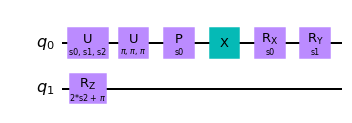

In [2]:
parameter_num=3
parameters=[]
for i in range(parameter_num):
    parameters.append(Parameter('s%i'%i))

simple=QuantumCircuit(2)

simple.u(parameters[0],parameters[1],parameters[2],0)
simple.u(np.pi,np.pi,np.pi,0)
simple.p(parameters[0],0)
simple.x(0)
simple.rx(parameters[0],0)
simple.ry(parameters[1],0)
simple.rz(2*parameters[2]+np.pi,1)
simple.draw('mpl')

In [3]:
from qiskit import QuantumRegister
from qiskit.circuit.quantumregister import Qubit
from qiskit.circuit.quantumcircuitdata import CircuitInstruction
g=simple.data[6]
g.qubits=(Qubit(QuantumRegister(1, 'q'), 0),)

g

CircuitInstruction(operation=Instruction(name='rz', num_qubits=1, num_clbits=0, params=[ParameterExpression(2*s2 + 3.14159265358979)]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=())

In [4]:
len(simple.parameters)

3

In [5]:
test=QuantumCircuit(1)
test.append(g)
test=transpile(test,basis_gates='u')
test.draw()

global phase: -1.0*s2 - π/2
   ┌─────────────────┐
q: ┤ U(0,0,2*s2 + π) ├
   └─────────────────┘

In [6]:
1j*test.global_phase

ParameterExpression(-0.5*I*(2*s2 + 3.14159265358979))

In [7]:
t=test.data[0].operation.params[0]
t

ParameterExpression(0)

In [8]:
from sympy import sympify, I
c=sympify('1.0*I*(exp(0.5*1j*s0+s1)/2 - exp(-0.5*I*s0)/2)*exp(1.5707963267949*I)')
c

1.0*I*(exp(0.5*I*s0 + s1)/2 - exp(-0.5*I*s0)/2)*exp(1.5707963267949*I)

In [9]:
d=c.args[2]
d

exp(0.5*I*s0 + s1)/2 - exp(-0.5*I*s0)/2

In [10]:
e=d.args[0]

In [11]:
f=d.args[0].args[1]
f

exp(0.5*I*s0 + s1)

In [12]:
type(f)

exp

In [13]:
f.args

(0.5*I*s0 + s1,)

In [14]:
sympify(0).args

()

In [15]:
dict1={(0,1,0):(1,0),(1,1,0):(0.5,3.14)}
dict2={(0,1,0):(1,0),(1,1,0):(0.5,3.14),(1,1,1):(0.5,3.14)}

In [16]:
key1=dict1.keys()
key2=dict2.keys()
key=min(key1)
key

(0, 1, 0)

In [17]:
item={key:dict1[key]}
item

{(0, 1, 0): (1, 0)}

In [18]:
list((0,1,0))-list((1,1,0))



TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
def div_item (data, item):
    dict1={}
    key=list(item.keys())[0]

    for K in data.keys():
        new_key=tuple([K[i] - key[i] for i in range(len(key))])
        value = (data[K][0]/item[key][0],data[K][1]-item[key][1] ) 
        dict1[new_key]=value

    return dict1


In [ ]:
div_item(dict2,item)

{(0, 0, 0): (1.0, 0), (1, 0, 0): (0.5, 3.14), (1, 0, 1): (0.5, 3.14)}

In [ ]:
def get_item(f):
    expr=f.args[0]
    dict1=dict()
    dict2=dict()
    for item in expr.free_symbols:
        # print(item)
        dict1[item]=expr.coeff(item)
        dict2[item]=0
    dict1[1]=expr.subs(dict2)
    return dict1

In [ ]:
dict1=get_item(f)
dict1

{s1: 1, s0: 0.5*I, 1: 0}

In [ ]:
dict1.pop
dict1

{s1: 1, s0: 0.5*I, 1: 0}

In [ ]:
import math
key=1
if math.isclose(dict1[key],0):
    dict1.pop(key,None)
dict1

{s1: 1, s0: 0.5*I}

In [ ]:
a=(0,0,1)

all(a[i]==0 for i in range (len(a)-1))


True

In [ ]:
from TDD.Exp.EXP import BDD
a=BDD()
a

{}

In [ ]:
a.is_zero

True

In [ ]:
keys=a.data.keys()
keys

dict_keys([])

In [ ]:
list(keys)[0]

IndexError: list index out of range

In [20]:
from qiskit.circuit import library
cir = library.TwoLocal(2, ['ry'],'cx', entanglement='circular', reps=0)
cir=transpile(cir,basis_gates=['id', 'rz', 'sx', 'x', 'cx'])
cir.draw()

global phase: π
     ┌────┐┌──────────────┐┌────┐┌────────┐
q_0: ┤ √X ├┤ Rz(θ[0] + π) ├┤ √X ├┤ Rz(3π) ├
     ├────┤├──────────────┤├────┤├────────┤
q_1: ┤ √X ├┤ Rz(θ[1] + π) ├┤ √X ├┤ Rz(3π) ├
     └────┘└──────────────┘└────┘└────────┘

用 is_parameterized() 就可以確認是否含有變數

https://qiskit.org/documentation/_modules/qiskit/circuit/instruction.html#Instruction.is_parameterized


In [ ]:
gate[0].is_parameterized()

True

In [ ]:
for item in params:
    print(item.parameters)

{Parameter(s0)}
set()
set()


In [ ]:
params=gate[0].params

from qiskit.circuit import Parameter
is_Parameter= lambda element: isinstance(element,Parameter)

if len(params)>0:
    def check_condition(lst, condition):
        for element in lst:
            if condition(element):
                return True
        return False
    if check_condition(params,is_Parameter):
        print('True')
    else:
        print('False')

True
